In [49]:
import time
import h5py
import numpy as np
import matplotlib.pyplot as plt
cmap = plt.cm.get_cmap('terrain').reversed()
import scipy.stats as st
from scipy.optimize import curve_fit
#from scipy.ndimage import rotate
import dask.array as da
import dask.dataframe as dd
import psutil
from distributed import LocalCluster, Client
from dask_jobqueue.slurm import SLURMCluster
base_folder = '/sdf/data/lcls/ds/rix/'
import os
import sys
#from chemRIXSAnalysis_BIP import *
from scipy.stats import binned_statistic
#from helper_funcs_AN import *
from scipy import ndimage
from reduceFuncs import *

%matplotlib widget 

/lscratch/amke/tmp/ipykernel_3728546/1693262014.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('terrain').reversed()


In [50]:
run = 24

exp = 'rix100836924'
#79,81,82,83,85,94,95,96,98


fname = f'{base_folder}/{exp}/hdf5/smalldata/{exp}_Run{run:04d}.h5'
fh = h5py.File(fname, 'r')
len(np.unique(fh['intg']['axis_svls']['mono_hrencoder_sum_value']))

9356

In [11]:
fh['intg']['axis_svls']['full_area'][:50,:50,:50]

array([[[  2.58 ,   5.885,  -4.258, ...,  14.345,  -5.773,  -9.527],
        [-60.102, -35.364,   6.808, ...,  18.444,  -8.86 ,  14.364],
        [ 34.685,   6.027,  -0.582, ..., -47.444, -14.171,  -8.64 ],
        ...,
        [  3.983,  29.26 ,  49.15 , ...,  -9.494, -45.691,   6.939],
        [  1.271,  10.3  , -12.596, ...,  -0.994,  18.812,  13.731],
        [-32.734, -11.569,  21.979, ...,  10.167,   0.982,   0.897]],

       [[  2.58 , -26.115,  11.742, ...,  14.345,  10.227,  -9.527],
        [ 19.898,  -3.364,   6.808, ...,   2.444,  -8.86 , -18.636],
        [-14.315,  23.027,  15.418, ...,  17.556, -30.171, -25.64 ],
        ...,
        [-28.017,  29.26 ,  32.15 , ..., -25.494,  19.309,   6.939],
        [ 17.271, -38.7  ,   3.404, ..., -16.994, -13.188,  -2.269],
        [ -0.734,  69.431, -11.021, ...,  26.167,  16.982,   0.897]],

       [[  2.58 ,   5.885,  27.742, ..., -17.655,  -5.773, -25.527],
        [  3.898, -19.364,   6.808, ...,   2.444,  -8.86 ,  14.364],
    

In [52]:

expected_count = 335

runs = [109] #define runs you want to reduce (also works for just a single run)
exp='rix100836924' #define experiment number

acq='ss'
dark = 22
for run in runs:
    data=chemRIXSdat(exp=exp, run=run,acq=acq, run_dark=dark, exp_c=expected_count) #this initiates the chemRIXSdat class
    data.init_data()   
    data.get_I0filter()                          #creates a filter based on I0 intensities
    data.get_APDfiltered()                       #sums APDs over defined ROIs, filtering on I0
    if acq == 'int':
        data.get_int()
    if ('x' in data.dat.keys()):
        data.get_inds_flyscans(bintype='Nbins',binvar=80)                    #indices for binning a step scan
    data.binning()                               #binning
    #data.save_reduced()                          #saving data
    #data.plot_run(norm=True)

missing key ('tt', 'ampl', 'amp_ss')
missing key ('tt', 'fltpos', 'pos_ss')
missing key ('tt', 'fltposfwhm', 'fwhm_ss')
missing key ('intg', 'andor_dir', 'full_area', 'dir')
(18215, 2048)
(18215, 796, 6144)
(18215, 288)
(18215, 288)
(18215,)
(18215,)
(18215, 8, 256)
(18215, 8, 256)
missing key ('intg', 'andor_vls', 'hsd_sum_full_hsd_1__ROI_wf', 'hsd1_wf_int')
(18215, 8, 256)
(18215, 8)
(18215, 8)
(18215, 8)
(18215,)
(18215, 2048)
(18215, 288)
(18215,)
This run is not a step scan.
Error loading integrated scan variables
missing key ('tt', 'ampl', 'amp_ss')
missing key ('tt', 'fltpos', 'pos_ss')
missing key ('tt', 'fltposfwhm', 'fwhm_ss')
(309, 2048)
(309, 2048)
(309, 796, 6144)
(309, 288)
(309, 288)
(309,)
(309,)
(309, 8, 256)
(309, 8, 256)
missing key ('intg', 'andor_vls', 'hsd_sum_full_hsd_1__ROI_wf', 'hsd1_wf_int')
(309, 8, 256)
(309, 8)
(309, 8)
(309, 8)
(309,)
(309, 2048)
(309, 288)
(309,)
This run is not a step scan.
Error loading integrated scan variables
loaded data
I0 filter


/sdf/group/lcls/ds/ana/sw/conda2/inst/envs/ps_20241122/lib/python3.9/site-packages/dask/array/core.py:1705: FutureWarning: The `numpy.polyval` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  warnings.warn(
/sdf/group/lcls/ds/ana/sw/conda2/inst/envs/ps_20241122/lib/python3.9/site-packages/dask/array/core.py:1705: FutureWarning: The `numpy.polyval` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  warnings.warn(


reduced APDs


KeyError: 'x_ss'

In [ ]:
data.save_reduced()             

/sdf/group/lcls/ds/ana/sw/conda2/inst/envs/ps_20241122/lib/python3.9/site-packages/dask/array/numpy_compat.py:56: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f0fb0143d00>>
Traceback (most recent call last):
  File "/sdf/group/lcls/ds/ana/sw/conda2/inst/envs/ps_20241122/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


In [ ]:
fig,ax=plt.subplots(1,1)
ax.pcolor(data.proc['SVLS_sort'].T)


In [ ]:
data.dat['svls'][:10,:10,:10].compute()

In [6]:
fname = './proc/Run26_mono.h5'
fh = h5py.File(fname, 'r')
fh.keys()

<KeysViewHDF5 ['DIR_sort', 'DIR_sort_off', 'DIR_sort_off_std', 'DIR_sort_on', 'DIR_sort_on_std', 'DIR_sort_std', 'DIRnorm_sort', 'DIRnorm_sort_off', 'DIRnorm_sort_off_std', 'DIRnorm_sort_on', 'DIRnorm_sort_on_std', 'DIRnorm_sort_std', 'Izero_sort', 'Izero_sort_off', 'Izero_sort_off_std', 'Izero_sort_on', 'Izero_sort_on_std', 'Izero_sort_std', 'RIXS_sort', 'RIXS_sort_off', 'RIXS_sort_off_std', 'RIXS_sort_on', 'RIXS_sort_on_std', 'RIXS_sort_std', 'apd_off_sort', 'apd_off_sort_I0corr', 'apd_off_std', 'apd_off_std_I0corr', 'apd_on_sort', 'apd_on_sort_I0corr', 'apd_on_std', 'apd_on_std_I0corr', 'apd_sort', 'apd_sort_I0corr', 'apd_std', 'apd_std_I0corr', 'x']>

In [9]:
fh['apd_sort'].shape

(81,)

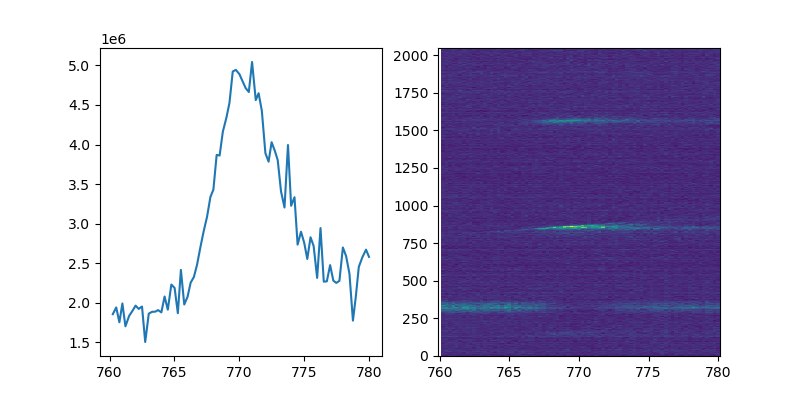

In [11]:
fig,ax =plt.subplots(1,2,figsize=(8,4))
y=np.arange(fh['RIXS_sort'].shape[1])
ax[0].plot(np.array(fh['x']),np.array(fh['apd_sort']))
ax[1].pcolor(np.array(fh['x']),y, np.array(fh['RIXS_sort']).T)

In [14]:
vls_offset_roi = [700,760]
svls_raw = data.dat['svls'][np.logical_and(data.dat['timestamp_filter'],data.dat['count_mask']),:,:]
if svls_raw.ndim == 3:
    svls_dark = np.nanmean(data.bg['svls'],axis=0)  
    svls_bgf = svls_raw - svls_dark[np.newaxis,:,:]

In [24]:
svls_bgf[:50,:50,:50].compute()

array([[[-240.33024595, -252.70601618, -205.72430744, ...,
         -228.30229773, -203.20498058, -186.65871521],
        [-234.02398706, -236.90913916, -214.39849191, ...,
         -224.78512621, -228.9931877 , -217.54318123],
        [-204.10801942, -161.11135599, -222.20089968, ...,
         -229.2467055 , -217.80744984, -213.61554693],
        ...,
        [-254.14702265, -222.54587702, -233.1483301 , ...,
         -207.16421359, -216.57682201, -230.80580906],
        [-206.96875728, -238.94488026, -205.95424272, ...,
         -248.70259871, -163.07486084, -200.34986408],
        [-255.82631392, -190.84466667, -231.54566343, ...,
         -220.32069256, -227.92240129, -174.63702913]],

       [[-224.33024595, -236.70601618, -205.72430744, ...,
         -196.30229773, -155.20498058, -202.65871521],
        [-250.02398706, -236.90913916, -214.39849191, ...,
         -224.78512621, -196.9931877 , -233.54318123],
        [-220.10801942, -242.11135599, -238.20089968, ...,
         -245.

In [19]:
run = 26
exp = 'rix100836924'
#79,81,82,83,85,94,95,96,98


fname = f'proc/Run{run:04d}_{data.dat['s']}.h5'
fh = h5py.File(fname, 'r')
fh['intg'].keys()

dask.array<sum-aggregate, shape=(9591, 796), dtype=float64, chunksize=(253, 255), chunktype=numpy.ndarray>

In [ ]:
fh